# $\S$ 2.5. Local Methods in High Dimensions

We have examined two learning techniques for prediction so far;
* the stable but biased linear model and
* the less stable but apparently less biased class of kNN estimates.

It would seem that with a reasonably large set of training data, we could always approximate the theoretically optimal conditional expectation by kNN averaging, since we should be able to find a fairly large neighborhood of observations close to any $x$ and average them.

### The curse of dimensionality (Bellman, 1961)

This approach and our intuition breaks down in high dimensions, and the phenomenon is commonly referred to as the _curse of dimensionality_ (Bellman, 1961). There are many manifestations of this problem, and we will examine a few here.

### The first example: Unit hypercube

Consider the nearest-neighbor procedure for inputs uniformly distributed in a p-dimensional unit hypercube. Suppose we send out a hypercubical neighborhood about a target point to capture a fraction $r$ of the observations. Since this corresponds to a fraction $r$ of the unit volume, the expected edge length will be 

\begin{equation}
e_p(r) = r^{1/p}.
\end{equation}

Note that $e_{10}(.01) = 0.63$ and $e_{10}(.1) = .80$, while the entire range for each input is only 1.0. Soto capture 1% or 10% of the data to form a local average, we must cover 63% or 80% of the range of each input variable. Such neighborhoods are no longer "local".

Reducing $r$ dramatically does not help much either, since the fewer observations we average, the higher is the variance of our fit.

In [1]:
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt

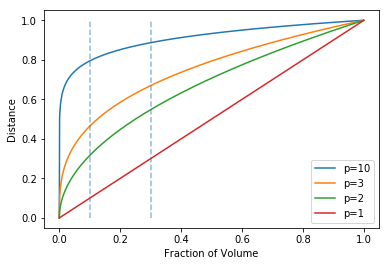

In [2]:
"""FIGURE 2.6. (right panel) The unit hypercube example"""
fraction_of_volume = np.arange(0, 1, 0.001)
edge_length_p1 = fraction_of_volume
edge_length_p2 = fraction_of_volume**.5
edge_length_p3 = fraction_of_volume**(1/3)
edge_length_p10 = fraction_of_volume**.1

fig1 = plt.figure(1)
ax11 = fig1.add_subplot(1, 1, 1)
ax11.plot(fraction_of_volume, edge_length_p10, label='p=10')
ax11.plot(fraction_of_volume, edge_length_p3, label='p=3')
ax11.plot(fraction_of_volume, edge_length_p2, label='p=2')
ax11.plot(fraction_of_volume, edge_length_p1, label='p=1')
ax11.set_xlabel('Fraction of Volume')
ax11.set_ylabel('Distance')
ax11.legend()
ax11.plot([.1, .1], [0, 1], '--', color='C0', alpha=.5)
ax11.plot([.3, .3], [0, 1], '--', color='C0', alpha=.5)
plt.show()

### The second example: Unit ball

In high dimensions all sample points are close to an edge of the sample.

Consider $N$ data points uniformly distributed in a $p$-dimensional unit ball centered at the origin. And consider a nearest-neighbor estimate at the origin. The median distance from the orign to the closest data point is given by the expression (Exercise 2.3)

\begin{equation}
d(p,N) = \left(1-\frac{1}{2}^{1/N}\right)^{1/p}.
\end{equation}

A more complicated expression exists for the mean distance to the closest point.

For $N=500, p=10$, $d(p,N)\approx0.52$, more than half way to the boundary. Hence most data points are close to the boundary of the sample space than to any other data point.

Why is this a problem? Prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.

### The third example: Sampling density

Another manifestiation of the curse is that the sampling density is proportional to $N^{1/p}$.

If $N_1=100$ represents a dense sample for a single input problem, then $N_{10}=100^{10}$ is the sample size required for the same sampling density with 10 inputs. Thus in high dimensions all feasible training samples sparsely populate the input space.

### The fourth example: Bias-variance decomposition

Let us construct another uniform example. Suppose
* we have 1000 training examples $x_i$ generated uniformly on $[-1,1]^p$, and
* the true relationship between $X$ and $Y$ is  

  \begin{equation}
  Y = f(X) = e^{-8\|X\|^2},
  \end{equation}
  
  without any measurement error.
* We use the 1NN rule to predict $y_0$ at the test-point $x_0=0$.

Denote the training set by $\mathcal{T}$. We can compute the expected prediction error at $x_0$ for our procedure, averaging over all such samples of size 1000. Since the problem is deterministic, this is the mean squared error (MSE) for estimating $f(0)$.

\begin{align}
\text{MSE}(x_0) &= \text{E}_\mathcal{T}\left[f(x_0)-\hat{y}_0\right]^2 \\
&= \text{E}_\mathcal{T}\left[f(x_0) -\text{E}_\mathcal{T}(\hat{y}_0) + \text{E}_\mathcal{T}(\hat{y}_0)-\hat{y}_0\right]^2 \\
&= \text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]^2 + \left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]^2 + 2\left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]\text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]\\
&= \text{E}_\mathcal{T}\left[\hat{y}_0 - \text{E}_\mathcal{T}(\hat{y}_0)\right]^2 + \left[\text{E}_\mathcal{T}(\hat{y}_0)-f(x_0)\right]^2 \\
&= \text{Var}_\mathcal{T}(\hat{y}_0) + \text{Bias}^2(\hat{y}_0)
\end{align}

We have broken down the MSE into two components that will become familiar as we proceed: Variance and squared bias. Such a decomposition is always possible and often useful, and is known as the _bias-variance decomposition_.

FIGURE 2.7 illustrates the setup. Unless the nearest neighbor is at 0, $\hat{y}$ will be biased downward. The variance  is due to the sampling variance of the 1NN.

In [3]:
"""FIGURE 2.7. (bottom panels) Bias-variance decomposition example.
Given the dimension p, 100 simulations are done and the following steps are
taken for each simulation.
1. Generate data of size 1000 from [-1, 1]^p
2. Grap the nearest neighbor x of 0 and calculate the distance, i.e., norm
3. Calculate y=f(x) and the variance and the squared bias for simulation
of size 100.
"""
def generate_data(p: int, n: int) ->np.ndarray:
    if p == 1:
        return np.array([random.uniform(-1, 1) for _ in range(n)])
    return np.array([
        [random.uniform(-1, 1) for _ in range(p)]
        for _ in range(n)
    ])


def f(p: int, x: np.ndarray) ->float:
    if p == 1:
        return math.exp(-8*(x**2))
    return math.exp(-8*sum(xi*xi for xi in x))


def simulate(p: int, nsample:int, nsim: int) ->dict:
    res = {'average_distance': 0}
    sum_y = 0
    sum_y_square = 0
    for _ in range(nsim):
        data = generate_data(p, nsample)
        if p == 1:
            data_norm = np.abs(data)
        else:
            data_norm = np.linalg.norm(data, ord=2, axis=1)
        nearest_index = data_norm.argmin()
        nearest_x, nearest_distance = data[nearest_index], data_norm[nearest_index]
        nearest_y = f(p, nearest_x)
        sum_y += nearest_y
        sum_y_square += nearest_y*nearest_y
        res['average_distance'] += nearest_distance
    average_y = sum_y/nsim
    res['average_distance'] /= nsim
    res['variance'] = sum_y_square/nsim - average_y*average_y
    res['squared_bias'] = (1-average_y)*(1-average_y)
    return res

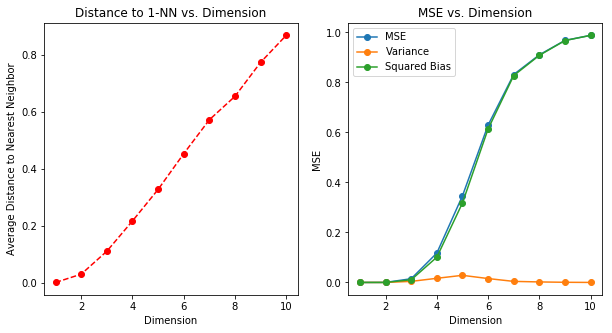

In [4]:
nsim = 100
data = {p: simulate(p, 1000, nsim) for p in range(1, 11)}
dimension = list(data.keys())
average_distance = [d['average_distance'] for p, d in data.items()]
variance = np.array([d['variance'] for p, d in data.items()])
squared_bias = np.array([d['squared_bias'] for p, d in data.items()])
mse = variance + squared_bias

fig2 = plt.figure(2, figsize=(10, 5))
ax21 = fig2.add_subplot(1, 2, 1)
ax21.set_title('Distance to 1-NN vs. Dimension')
ax21.plot(dimension, average_distance, 'ro--')
ax21.set_xlabel('Dimension')
ax21.set_ylabel('Average Distance to Nearest Neighbor')

ax22 = fig2.add_subplot(1, 2, 2)
ax22.set_title('MSE vs. Dimension')
ax22.plot(dimension, mse, 'o-', label='MSE')
ax22.plot(dimension, variance, 'o-', label='Variance')
ax22.plot(dimension, squared_bias, 'o-', label='Squared Bias')
ax22.set_xlabel('Dimension')
ax22.set_ylabel('MSE')
ax22.legend()
plt.show()

In low dimensions and with $N = 1000$, the nearest neighbor is very close to $0$, and so both the bias and variance are small. As the dimension increases, the nearest neighbor tends to stray further from the target point, and both bias and variance are incurred. By $p = 10$, for more than $99\%$ of the samples the nearest neighbor is a distance greater than $0.5$ from the origin.

Thus as $p$ increases, the estimate tends to be 0 more often than not, and hence the MSE levels off at 1.0, as does the bias, and the variance starts dropping (an artifact of this example).

Although this is a highly contrived example, similar phenomena occur more generally. The complexity of functions of many variables can grow exponentially with the dimension, and if we wish to be able to estimate such functions with the same accuracy as functions in low dimension, then we need the size of our training set to grow exponentially as well. In this example, the function is a complex interaction of all $p$ variables involved.

The dependence of the bias term on distance depends on the truch, and it need not always dominate with 1NN. For example, if the function always involves only a few dimensions as in FIGURE 2.8, then the variance can dominate instead.

In [5]:
"""FIGURE 2.8. The variance-dominating example."""
print('Please check this later ...')

Please check this later ...


### What good about the linear model?

> By imposing some heavy restrictions on the class of models being fitted, we can avoid the curse of dimensionality.

Suppose the relationship between $Y$ and $X$ is linear,

\begin{equation}
Y=X^T\beta+\epsilon,
\end{equation}

where $\epsilon\sim N(0,\sigma^2)$.

We fit the model by least squares to the training data. For an arbitrary test point $x_0$, we have $\hat{y_0} = x_0^T \hat\beta$, which can be written as

\begin{equation}
\hat{y}_0=x_0^T \beta + \sum_{i=1}^N l_i(x_0) \epsilon_i,
\end{equation}

where $l_i(x_0)$ is the $i$th element of $\mathbf{X}\left( \mathbf{X}^T \mathbf{X} \right)^{-1} x_0$.

Since under this model the least squares estimates are unbiased, we find that

\begin{align}
\text{EPE}(x_0) &= \text{E}_{y_0|x_0}\text{E}_\mathcal{T}\left(y_0-\hat{y}_0\right)^2 \\
&= \text{Var}(y_0|x_0) + \text{E}_\mathcal{T} \left(\hat{y}_0 - \text{E}_\mathcal{T}\hat{y}_0\right)^2 + \left(\text{E}_\mathcal{T}\hat{y}_0 - x_0^T\beta\right)^2 \\
&= \text{Var}(y_0|x_0) + \text{Var}_\mathcal{T}(\hat{y}_0) + \text{Bias}^2(\hat{y}_0) \\
&= \sigma^2 + \text{E}_\mathcal{T}x_0^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}x_0\sigma^2 + 0^2.
\end{align}

Note that
1. An additional variance $\sigma^2$ is incurred, since our target is not deterministic.
2. There is no bias, and the variance depends on $x_0$.

If
* $N$ is large,
* $\mathcal{T}$ were selected at random, and
* $\text{E}(X)=0$,

then $\mathbf{X}^T\mathbf{X}\rightarrow N\text{Cov}(X)$ and

\begin{align}
\text{E}_{x_0}\text{EPE}(x_0) &\sim \text{E}_{x_0}x_0^T\text{Cov}(X)^{-1}x_0\sigma^2/N + \sigma^2 \\
&= \text{trace}\left(\text{Cov}(X)^{-1}\text{Cov}(x_0)\right)\sigma^2/N + \sigma^2 \\
&= \sigma^2(p/N)+\sigma^2.
\end{align}

The expected EPE increases linearly as a function of $p$, with slope $\sigma^2/N$. If $N$ is large and/or $\sigma^2$ is small, this growth is variance is negligible (0 in the deterministic case).

By imposing some heavy restrictions on the class of models being fitted, we have avoided the curse of dimensionality. Some of the technical details are derived in Exercise 2.5.

### EPE comparison: 1NN vs. least squares

FIGURE 2.9 compares 1NN vs. least squares in two situations, both of which have the form

\begin{equation}
Y = f(X) + \epsilon,
\end{equation}

* $X$ uniform as before,
* $\epsilon \sim N(0,1)$,
* $N=500$.

For the orange curve, $f(x) = x_1$ is linear in the first coordinate, for the blue curve, $f(x) = \frac{1}{2}(x_1+1)^3$ is cubic as in the figure.

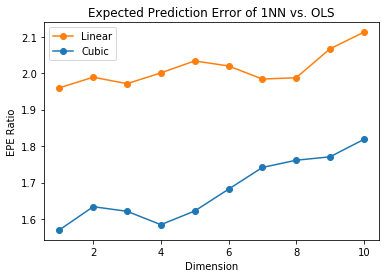

In [8]:
"""FIGURE 2.9. Relative EPE (at x_0 = 0) ratio for 1NN vs. least squares"""
size_simulation = 10000
size_train = 500
p = 10

list_epe_ols_linear = []
list_epe_1nn_linear = []
list_epe_ols_cubic = []
list_epe_1nn_cubic = []

for _ in range(size_simulation):
    epe_linear = []
    # Generate data
    train_x = np.random.uniform(-1, 1, size=(size_train, p))
    train_y_linear = train_x[:, 0]
    train_y_cubic = ((train_x[:, 0]+1)**3)/2
    train_error = np.random.randn(size_train)
    train_ye_linear = train_y_linear + train_error
    train_ye_cubic = train_y_cubic + train_error
    
    epe_ols_linear = []
    epe_1nn_linear = []
    epe_ols_cubic = []
    epe_1nn_cubic = []
    for dim in range(1, p+1):
        # Cut the dimension
        partial_x = train_x[:, :dim]
        partial_1x = np.hstack((np.ones((size_train, 1)), partial_x))
        
        obs_y_linear = np.random.randn(1)
        obs_y_cubic = .5 + np.random.randn(1)

        # Least squares for linear f
        xx = partial_1x.T @ partial_1x
        xy_linear = partial_1x.T @ train_ye_linear
        xxxy_linear = np.linalg.solve(xx, xy_linear)
        hat_ols = np.array([1] + [0]*dim) @ xxxy_linear
        epe_ols_linear.append((hat_ols-obs_y_linear)**2)

        # 1NN for linear f
        mat_norm = (partial_x*partial_x).sum(axis=1)
        nn = mat_norm.argmin()
        hat_1nn = train_ye_linear[nn]
        epe_1nn_linear.append((hat_1nn-obs_y_linear)**2)
        
        # Least squares for cubic f
        xy_cubic = partial_1x.T @ train_ye_cubic
        xxxy_cubic = np.linalg.solve(xx, xy_cubic)
        hat_ols = np.array([1] + [0]*dim) @ xxxy_cubic
        epe_ols_cubic.append((hat_ols-obs_y_cubic)**2)
        
        # 1NN for cubic f
        hat_1nn = train_ye_cubic[nn]
        epe_1nn_cubic.append((hat_1nn-obs_y_cubic)**2)

    list_epe_ols_linear.append(epe_ols_linear)
    list_epe_1nn_linear.append(epe_1nn_linear)
    list_epe_ols_cubic.append(epe_ols_cubic)
    list_epe_1nn_cubic.append(epe_1nn_cubic)

arr_epe_ols_linear = np.array(list_epe_ols_linear)
arr_epe_1nn_linear = np.array(list_epe_1nn_linear)
arr_epe_ols_cubic = np.array(list_epe_ols_cubic)
arr_epe_1nn_cubic = np.array(list_epe_1nn_cubic)

# Compute EPE, finally
epe_ols_linear = arr_epe_ols_linear.mean(axis=0)
epe_1nn_linear = arr_epe_1nn_linear.mean(axis=0)
epe_ols_cubic = arr_epe_ols_cubic.mean(axis=0)
epe_1nn_cubic = arr_epe_1nn_cubic.mean(axis=0)

# Plot
plot_x = list(range(1, p+1))
fig4 = plt.figure(4)
ax41 = fig4.add_subplot(1, 1, 1)
ax41.plot(plot_x, epe_1nn_linear/epe_ols_linear, '-o',
          color='C1', label='Linear')
ax41.plot(plot_x, epe_1nn_cubic/epe_ols_cubic, '-o',
          color='C0', label='Cubic')
ax41.legend()
ax41.set_xlabel('Dimension')
ax41.set_ylabel('EPE Ratio')
ax41.set_title('Expected Prediction Error of 1NN vs. OLS')
plt.show()

#### Linear case

Shown is the relative EPE of 1NN to least squares, which appears to start at around 2 for the linear case.

Least squares is unbiased in this case, and as discussed above the EPE is slightly above $\sigma^2 = 1$.

The EPE for 1NN is always above 2, since the variance of $\hat{f}(x_0)$ in this case is at least $\sigma^2$, and the ratio increases with dimension as the nearest neighbor strays from the target point.

#### Cubic case

For the cubic case, least squares is biased, which moderates the ratio.

Clearly we could manufacture examples where the bias of least squares would dominate the variance, and the 1NN would come out the winner.

> By relying on rigid assumptions, the linear model has no bias at all and negligible variance, while the error in 1-nearest neighbor is substantially larger. However, if the assumptions are wrong, all bets are off and the 1-nearest neighbor may dominate. We will see that there is a whole spectrum of models between the rigid linear models and the extremely flexible 1-nearest-neighbor models, each with their own assumptions and biases, which have been proposed specifically to avoid the exponential growth in complexity of functions in high dimensions by drawing heavily on these assumptions.

Before we delve more deeply, let us elaborate a bit on the concept of _statistical models_ and see how they fit into the prediction framework.